# Creditwise Loan System:
- Minor Project - Machine Learning.

In [121]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

## Load Data:

In [122]:
df = pd.read_csv("loan_approval_data.csv")
df.head()
df
df.info()
df.isnull().sum()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Applicant_ID        950 non-null    float64
 1   Applicant_Income    950 non-null    float64
 2   Coapplicant_Income  950 non-null    float64
 3   Employment_Status   950 non-null    object 
 4   Age                 950 non-null    float64
 5   Marital_Status      950 non-null    object 
 6   Dependents          950 non-null    float64
 7   Credit_Score        950 non-null    float64
 8   Existing_Loans      950 non-null    float64
 9   DTI_Ratio           950 non-null    float64
 10  Savings             950 non-null    float64
 11  Collateral_Value    950 non-null    float64
 12  Loan_Amount         950 non-null    float64
 13  Loan_Term           950 non-null    float64
 14  Loan_Purpose        950 non-null    object 
 15  Property_Area       950 non-null    object 
 16  Educati

,Applicant_ID,Applicant_Income,Coapplicant_Income,Age,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,Loan_Term
count,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000
mean,501.220000,10852.571579,5082.455789,39.971579,1.474737,676.033684,1.950526,0.347263,9940.452632,24802.792632,20522.825263,48.000000
std,289.608451,5061.632859,2943.161570,11.139797,1.105067,71.346015,1.406246,0.144341,5860.736885,14345.696031,11504.142575,24.245322
min,1.000000,2009.000000,1.000000,21.000000,0.000000,550.000000,0.000000,0.100000,65.000000,36.000000,1015.000000,12.000000
25%,250.250000,6730.750000,2472.750000,30.250000,1.000000,616.250000,1.000000,0.220000,4760.250000,12698.250000,9806.250000,24.000000
50%,499.500000,10548.000000,5205.500000,40.000000,1.000000,678.000000,2.000000,0.340000,9880.500000,24321.000000,21210.500000,48.000000
75%,752.750000,15190.000000,7620.750000,49.000000,2.000000,737.000000,3.000000,0.480000,15074.500000,36947.000000,30263.000000,72.000000
max,1000.000000,19988.000000,9996.000000,59.000000,3.000000,799.000000,4.000000,0.600000,19996.000000,49954.000000,39995.000000,84.000000


## Handle Missing Data / Values:

In [123]:
categorical_cols = df.select_dtypes(include=["object"]).columns
numerical_cols = df.select_dtypes(include=["number"]).columns # number

In [124]:
categorical_cols

Index(['Employment_Status', 'Marital_Status', 'Loan_Purpose', 'Property_Area',
       'Education_Level', 'Gender', 'Employer_Category', 'Loan_Approved'],
      dtype='object')

In [125]:
numerical_cols

Index(['Applicant_ID', 'Applicant_Income', 'Coapplicant_Income', 'Age',
       'Dependents', 'Credit_Score', 'Existing_Loans', 'DTI_Ratio', 'Savings',
       'Collateral_Value', 'Loan_Amount', 'Loan_Term'],
      dtype='object')

In [126]:
categorical_cols.size + numerical_cols.size

20

In [127]:
# Numerical NaN Filled with 'mean' values:

num_imp = SimpleImputer(strategy="mean")
num_imp.fit_transform(df[numerical_cols])

array([[1.0000e+00, 1.7795e+04, 1.3870e+03, ..., 4.5638e+04, 1.6619e+04,
        8.4000e+01],
       [2.0000e+00, 2.8600e+03, 2.6790e+03, ..., 4.9272e+04, 3.8687e+04,
        4.8000e+01],
       [3.0000e+00, 7.3900e+03, 2.1060e+03, ..., 6.9080e+03, 2.7943e+04,
        7.2000e+01],
       ...,
       [9.9800e+02, 1.5192e+04, 8.4330e+03, ..., 4.1335e+04, 1.6203e+04,
        2.4000e+01],
       [9.9900e+02, 9.0830e+03, 7.3800e+03, ..., 8.9330e+03, 1.0290e+04,
        3.6000e+01],
       [1.0000e+03, 1.3093e+04, 2.3850e+03, ..., 2.5816e+04, 3.5818e+04,
        4.8000e+01]])

In [128]:
df[numerical_cols] = num_imp.fit_transform(df[numerical_cols])

In [129]:
df.head()

,Applicant_ID,Applicant_Income,Coapplicant_Income,Employment_Status,Age,Marital_Status,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,Loan_Term,Loan_Purpose,Property_Area,Education_Level,Gender,Employer_Category,Loan_Approved
0,1.0,17795.0,1387.0,Salaried,51.0,Married,0.0,637.0,4.0,0.53,19403.0,45638.0,16619.0,84.0,Personal,Urban,Not Graduate,Female,Private,No
1,2.0,2860.0,2679.0,Salaried,46.0,Married,3.0,621.0,2.0,0.30,2580.0,49272.0,38687.0,48.0,Car,Semiurban,Graduate,NaN,Private,No
2,3.0,7390.0,2106.0,Salaried,25.0,Single,2.0,674.0,4.0,0.20,13844.0,6908.0,27943.0,72.0,NaN,Urban,NaN,Female,Government,Yes
3,4.0,13964.0,8173.0,Salaried,40.0,Married,2.0,579.0,3.0,0.31,9553.0,10844.0,27819.0,60.0,Business,Rural,Graduate,Female,Government,No
4,5.0,13284.0,4223.0,Self-employed,31.0,Single,2.0,721.0,1.0,0.29,9386.0,37629.0,12741.0,72.0,Car,NaN,Graduate,Male,Private,Yes


In [130]:
# Catagorical NaN Filled with 'most frequent' values:

cat_imp = SimpleImputer(strategy="most_frequent")
df[categorical_cols] = cat_imp.fit_transform(df[categorical_cols])

In [131]:
df
df.head()
df.isnull().sum()

Applicant_ID          0
Applicant_Income      0
Coapplicant_Income    0
Employment_Status     0
Age                   0
Marital_Status        0
Dependents            0
Credit_Score          0
Existing_Loans        0
DTI_Ratio             0
Savings               0
Collateral_Value      0
Loan_Amount           0
Loan_Term             0
Loan_Purpose          0
Property_Area         0
Education_Level       0
Gender                0
Employer_Category     0
Loan_Approved         0
dtype: int64

## Expolatory Data Analysis: EDA
- How balanced our classes are.

Text(0.5, 1.0, 'Is Loan Approved or Not?')

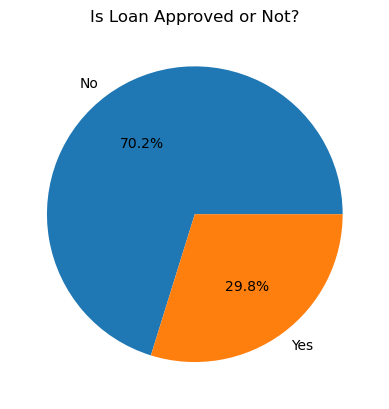

In [132]:
classes_count = df["Loan_Approved"].value_counts()

plt.pie(classes_count, labels=["No", "Yes"], autopct="%1.1f%%")
plt.title("Is Loan Approved or Not?")

<Axes: xlabel='Gender', ylabel='count'>

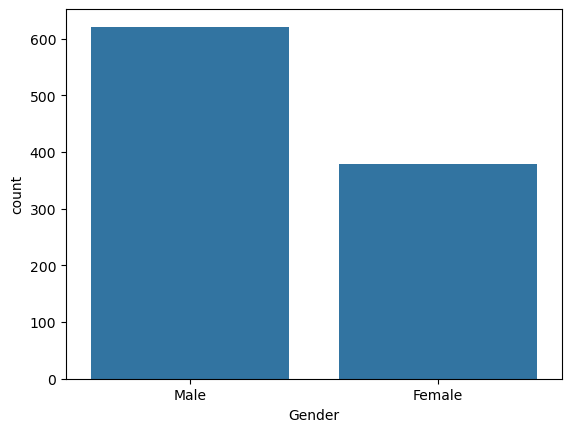

In [133]:
# Analyse Categories:

gender_count = df["Gender"].value_counts()
sns.barplot(gender_count)

[Text(0, 0, '621'), Text(0, 0, '379')]

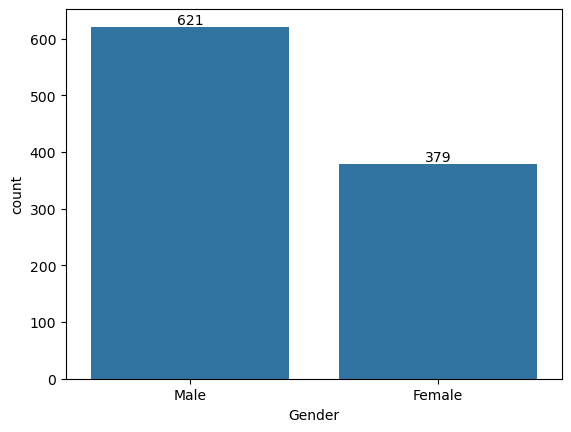

In [134]:
ax = sns.barplot(gender_count)
ax.bar_label(ax.containers[0])

[Text(0, 0, '722'), Text(0, 0, '278')]

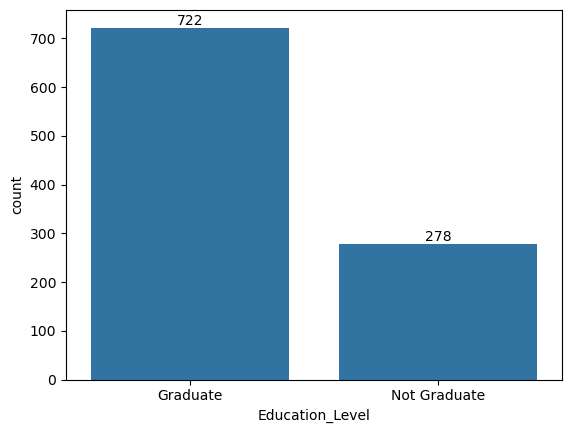

In [135]:
education_count = df["Education_Level"].value_counts()
ax = sns.barplot(education_count)
ax.bar_label(ax.containers[0])

<Axes: xlabel='Applicant_Income', ylabel='Count'>

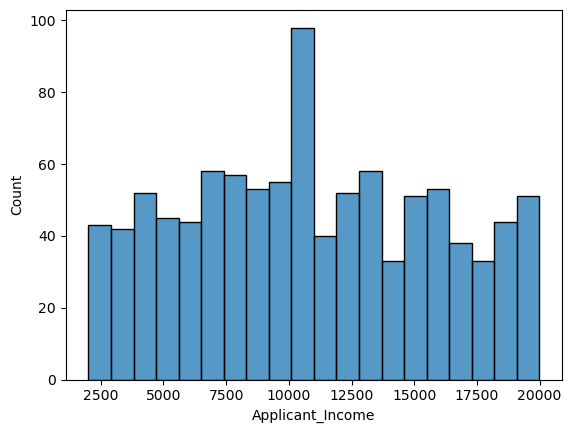

In [136]:
# Analyse Income:

sns.histplot(
    data = df,
    x = "Applicant_Income",
    bins = 20
)

<Axes: xlabel='Coapplicant_Income', ylabel='Count'>

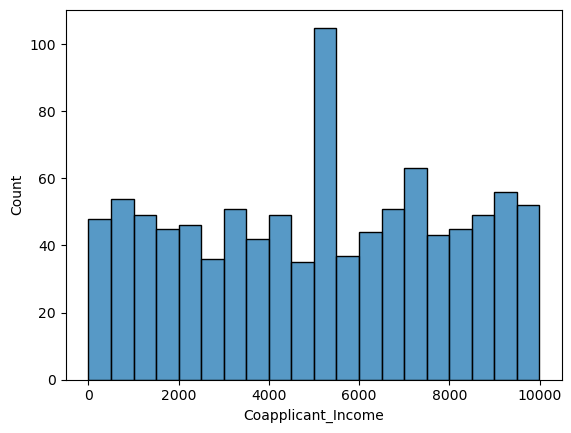

In [137]:
sns.histplot(
    data = df,
    x = "Coapplicant_Income",
    bins = 20
)

<Axes: xlabel='Loan_Approved', ylabel='Applicant_Income'>

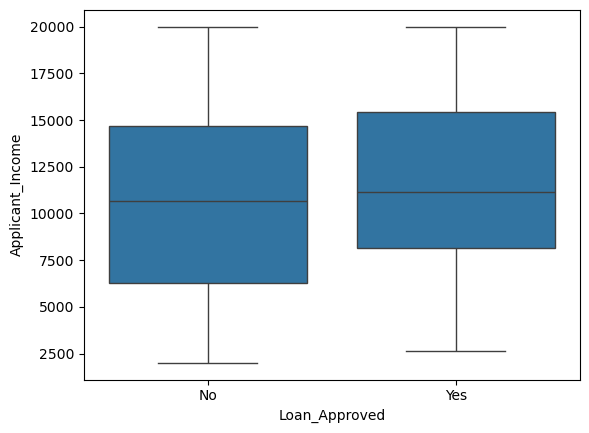

In [138]:
# Outliers - Box Plots:

sns.boxplot(
    data = df,
    x = "Loan_Approved",
    y = "Applicant_Income"
)

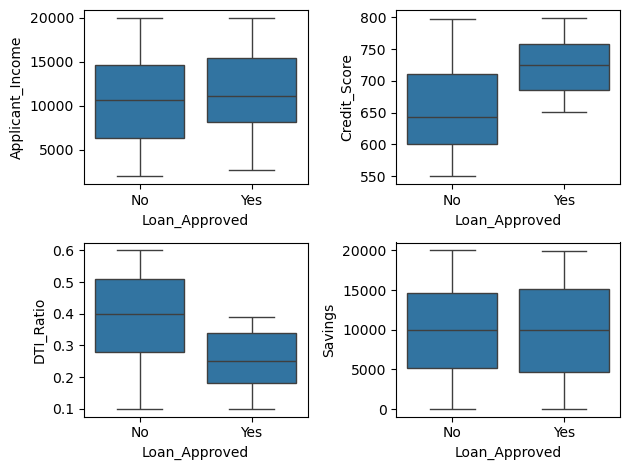

In [139]:
fig, axis = plt.subplots(2, 2)

sns.boxplot(ax = axis[0, 0], data = df, x = "Loan_Approved", y = "Applicant_Income")
sns.boxplot(ax = axis[0, 1], data = df, x = "Loan_Approved", y = "Credit_Score")
sns.boxplot(ax = axis[1, 0], data = df, x = "Loan_Approved", y = "DTI_Ratio")
sns.boxplot(ax = axis[1, 1], data = df, x = "Loan_Approved", y = "Savings")

plt.tight_layout()


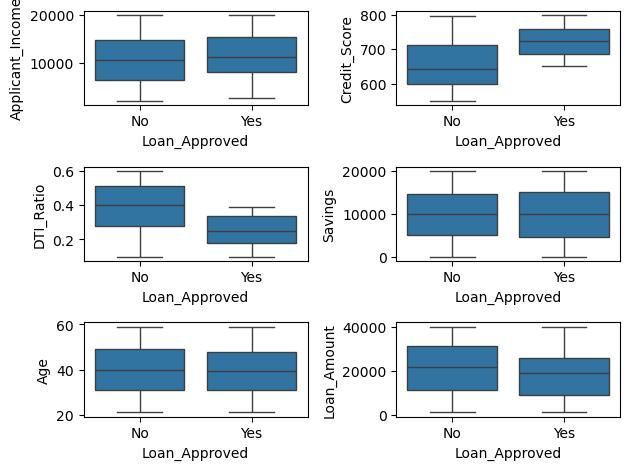

In [140]:
fig, axis = plt.subplots(3, 2)

sns.boxplot(ax = axis[0, 0], data = df, x = "Loan_Approved", y = "Applicant_Income")
sns.boxplot(ax = axis[0, 1], data = df, x = "Loan_Approved", y = "Credit_Score")
sns.boxplot(ax = axis[1, 0], data = df, x = "Loan_Approved", y = "DTI_Ratio")
sns.boxplot(ax = axis[1, 1], data = df, x = "Loan_Approved", y = "Savings")
sns.boxplot(ax = axis[2, 0], data = df, x = "Loan_Approved", y = "Age")
sns.boxplot(ax = axis[2, 1], data = df, x = "Loan_Approved", y = "Loan_Amount")

plt.tight_layout()


<Axes: xlabel='Credit_Score', ylabel='Count'>

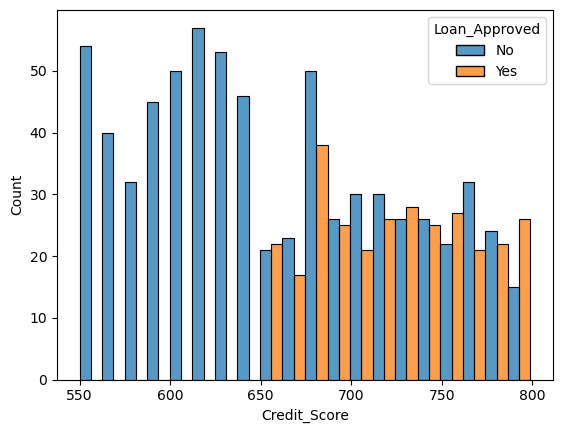

In [141]:
# Credit Score with Loan Approved:

sns.histplot(
    data = df,
    x = "Credit_Score",
    hue = "Loan_Approved",
    bins = 20,
    multiple = "dodge"
)


<Axes: xlabel='Applicant_Income', ylabel='Count'>

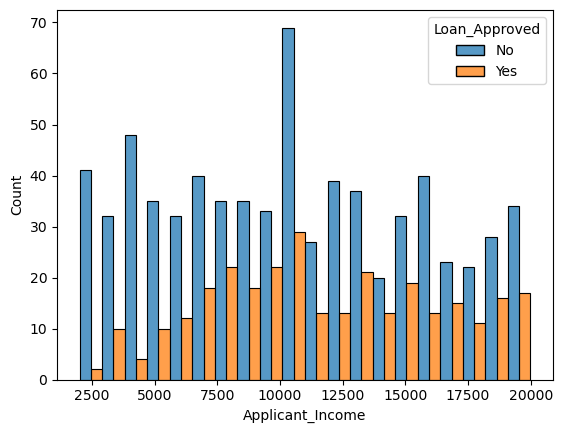

In [142]:
sns.histplot(
    data = df,
    x = "Applicant_Income",
    hue = "Loan_Approved",
    bins = 20,
    multiple = "dodge"
)

In [143]:
# Remove the applicant id:

df = df.drop("Applicant_ID", axis = 1)
df.head()

,Applicant_Income,Coapplicant_Income,Employment_Status,Age,Marital_Status,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,Loan_Term,Loan_Purpose,Property_Area,Education_Level,Gender,Employer_Category,Loan_Approved
0,17795.0,1387.0,Salaried,51.0,Married,0.0,637.0,4.0,0.53,19403.0,45638.0,16619.0,84.0,Personal,Urban,Not Graduate,Female,Private,No
1,2860.0,2679.0,Salaried,46.0,Married,3.0,621.0,2.0,0.30,2580.0,49272.0,38687.0,48.0,Car,Semiurban,Graduate,Male,Private,No
2,7390.0,2106.0,Salaried,25.0,Single,2.0,674.0,4.0,0.20,13844.0,6908.0,27943.0,72.0,Business,Urban,Graduate,Female,Government,Yes
3,13964.0,8173.0,Salaried,40.0,Married,2.0,579.0,3.0,0.31,9553.0,10844.0,27819.0,60.0,Business,Rural,Graduate,Female,Government,No
4,13284.0,4223.0,Self-employed,31.0,Single,2.0,721.0,1.0,0.29,9386.0,37629.0,12741.0,72.0,Car,Urban,Graduate,Male,Private,Yes


## Feature Encoding:

In [144]:
df.head()
df.columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Applicant_Income    1000 non-null   float64
 1   Coapplicant_Income  1000 non-null   float64
 2   Employment_Status   1000 non-null   object 
 3   Age                 1000 non-null   float64
 4   Marital_Status      1000 non-null   object 
 5   Dependents          1000 non-null   float64
 6   Credit_Score        1000 non-null   float64
 7   Existing_Loans      1000 non-null   float64
 8   DTI_Ratio           1000 non-null   float64
 9   Savings             1000 non-null   float64
 10  Collateral_Value    1000 non-null   float64
 11  Loan_Amount         1000 non-null   float64
 12  Loan_Term           1000 non-null   float64
 13  Loan_Purpose        1000 non-null   object 
 14  Property_Area       1000 non-null   object 
 15  Education_Level     1000 non-null   object 
 16  Gender 

In [145]:
le = LabelEncoder()

df["Education_Level"] = le.fit_transform(df["Education_Level"])
df["Loan_Approved"] = le.fit_transform(df["Loan_Approved"])


In [146]:
df.head()

,Applicant_Income,Coapplicant_Income,Employment_Status,Age,Marital_Status,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,Loan_Term,Loan_Purpose,Property_Area,Education_Level,Gender,Employer_Category,Loan_Approved
0,17795.0,1387.0,Salaried,51.0,Married,0.0,637.0,4.0,0.53,19403.0,45638.0,16619.0,84.0,Personal,Urban,1,Female,Private,0
1,2860.0,2679.0,Salaried,46.0,Married,3.0,621.0,2.0,0.30,2580.0,49272.0,38687.0,48.0,Car,Semiurban,0,Male,Private,0
2,7390.0,2106.0,Salaried,25.0,Single,2.0,674.0,4.0,0.20,13844.0,6908.0,27943.0,72.0,Business,Urban,0,Female,Government,1
3,13964.0,8173.0,Salaried,40.0,Married,2.0,579.0,3.0,0.31,9553.0,10844.0,27819.0,60.0,Business,Rural,0,Female,Government,0
4,13284.0,4223.0,Self-employed,31.0,Single,2.0,721.0,1.0,0.29,9386.0,37629.0,12741.0,72.0,Car,Urban,0,Male,Private,1


In [147]:
cols = [
    "Employment_Status",
    "Marital_Status",
    "Loan_Purpose",
    "Property_Area",
    "Gender",
    "Employer_Category"
]

ohe = OneHotEncoder(drop="first", sparse_output=False, handle_unknown="ignore")
encoded = ohe.fit_transform(df[cols])

In [148]:
encoded

array([[1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.]])

In [149]:
encoded_df = pd.DataFrame(
    encoded,
    columns = ohe.get_feature_names_out(cols),
    index = df.index
)

encoded_df.head()

,Employment_Status_Salaried,Employment_Status_Self-employed,Employment_Status_Unemployed,Marital_Status_Single,Loan_Purpose_Car,Loan_Purpose_Education,Loan_Purpose_Home,Loan_Purpose_Personal,Property_Area_Semiurban,Property_Area_Urban,Gender_Male,Employer_Category_Government,Employer_Category_MNC,Employer_Category_Private,Employer_Category_Unemployed
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0


In [150]:
df = pd.concat([df.drop(columns = cols), encoded_df], axis = 1)

In [151]:
ohe.get_feature_names_out(cols)

array(['Employment_Status_Salaried', 'Employment_Status_Self-employed',
       'Employment_Status_Unemployed', 'Marital_Status_Single',
       'Loan_Purpose_Car', 'Loan_Purpose_Education', 'Loan_Purpose_Home',
       'Loan_Purpose_Personal', 'Property_Area_Semiurban',
       'Property_Area_Urban', 'Gender_Male',
       'Employer_Category_Government', 'Employer_Category_MNC',
       'Employer_Category_Private', 'Employer_Category_Unemployed'],
      dtype=object)

In [152]:
df.head()

,Applicant_Income,Coapplicant_Income,Age,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,...,Loan_Purpose_Education,Loan_Purpose_Home,Loan_Purpose_Personal,Property_Area_Semiurban,Property_Area_Urban,Gender_Male,Employer_Category_Government,Employer_Category_MNC,Employer_Category_Private,Employer_Category_Unemployed
0,17795.0,1387.0,51.0,0.0,637.0,4.0,0.53,19403.0,45638.0,16619.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,2860.0,2679.0,46.0,3.0,621.0,2.0,0.30,2580.0,49272.0,38687.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,7390.0,2106.0,25.0,2.0,674.0,4.0,0.20,13844.0,6908.0,27943.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,13964.0,8173.0,40.0,2.0,579.0,3.0,0.31,9553.0,10844.0,27819.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,13284.0,4223.0,31.0,2.0,721.0,1.0,0.29,9386.0,37629.0,12741.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0


In [153]:
df.describe()

,Applicant_Income,Coapplicant_Income,Age,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,...,Loan_Purpose_Education,Loan_Purpose_Home,Loan_Purpose_Personal,Property_Area_Semiurban,Property_Area_Urban,Gender_Male,Employer_Category_Government,Employer_Category_MNC,Employer_Category_Private,Employer_Category_Unemployed
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,10852.571579,5082.455789,39.971579,1.474737,676.033684,1.950526,0.347263,9940.452632,24802.792632,20522.825263,...,0.181000,0.190000,0.178000,0.189000,0.517000,0.621000,0.202000,0.144000,0.422000,0.097000
std,4933.339492,2868.563488,10.857445,1.077058,69.537662,1.370603,0.140683,5712.189236,13982.086562,11212.555805,...,0.385211,0.392497,0.382704,0.391705,0.499961,0.485381,0.401693,0.351265,0.494126,0.296106
min,2009.000000,1.000000,21.000000,0.000000,550.000000,0.000000,0.100000,65.000000,36.000000,1015.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6857.000000,2701.250000,31.000000,1.000000,618.000000,1.000000,0.230000,4964.000000,13166.000000,10478.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,10852.571579,5082.455789,39.971579,1.237368,676.033684,2.000000,0.347263,9940.452632,24802.792632,20522.825263,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,14973.250000,7452.750000,49.000000,2.000000,735.000000,3.000000,0.470000,14784.750000,36396.000000,29683.250000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,19988.000000,9996.000000,59.000000,3.000000,799.000000,4.000000,0.600000,19996.000000,49954.000000,39995.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 28 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Applicant_Income                 1000 non-null   float64
 1   Coapplicant_Income               1000 non-null   float64
 2   Age                              1000 non-null   float64
 3   Dependents                       1000 non-null   float64
 4   Credit_Score                     1000 non-null   float64
 5   Existing_Loans                   1000 non-null   float64
 6   DTI_Ratio                        1000 non-null   float64
 7   Savings                          1000 non-null   float64
 8   Collateral_Value                 1000 non-null   float64
 9   Loan_Amount                      1000 non-null   float64
 10  Loan_Term                        1000 non-null   float64
 11  Education_Level                  1000 non-null   int64  
 12  Loan_Approved        

## Correlation Heatmap:

In [157]:
num_cols = df.select_dtypes(include = "number")
corr_matrix = num_cols.corr()

In [162]:
corr_matrix
num_cols.corr()["Loan_Approved"].sort_values(ascending=False)

Loan_Approved                      1.000000
Credit_Score                       0.451175
Applicant_Income                   0.119796
Employer_Category_MNC              0.069049
Loan_Purpose_Personal              0.034043
Marital_Status_Single              0.030182
Property_Area_Urban                0.025963
Collateral_Value                   0.021868
Coapplicant_Income                 0.004230
Loan_Purpose_Home                  0.002118
Employment_Status_Self-employed   -0.001337
Employer_Category_Private         -0.003347
Property_Area_Semiurban           -0.012967
Savings                           -0.013437
Loan_Purpose_Education            -0.016684
Employer_Category_Unemployed      -0.021468
Age                               -0.022343
Dependents                        -0.023811
Existing_Loans                    -0.034794
Employer_Category_Government      -0.039187
Employment_Status_Salaried        -0.041428
Employment_Status_Unemployed      -0.044464
Education_Level                 